# Medium_range National Water Model Forecast
### Workflow for creating a 10-day (no ensemble members) or 8.5-day (with ensemble members) streamflow forecast given a date, time, and NHDplus COMID (stream segment identifier)

In [1]:
import sys; sys.path.append('..')
from fcast import MediumRange, Assim, get_USGS_rc, plotMediumRange
import gcsfs
%matplotlib inline

## Set up the Google Cloud File System

In [2]:
fs = gcsfs.GCSFileSystem(project='national-water-model')

## Set the parameters

In [3]:
date = '20190802' # a date
start_hr = '00' # start at 00:00 because its easy at the moment
comid = 4512772 # some small segment on the Potomac near DC
# comid = 229757 # the South Platte River in Denver
# comid = 7471678 # somewhere on the Mississippi River

## Get medium range streamflow forecast

In [4]:
sim = Assim(fs, comid, date, start_hr)
mr = MediumRange(fs, comid, date, start_hr)
mr_df = mr.get_streamflow(sim.assim_time, sim.assim_flow)
mr_df.head()

,1,2,3,4,5,6,7,mean
2019-08-02 00:00:00,112.699997,112.699997,112.699997,112.699997,112.699997,112.699997,112.699997,112.699997
2019-08-02 03:00:00,129.759997,129.759997,129.759997,129.759997,129.759997,129.759997,129.759997,129.759997
2019-08-02 06:00:00,138.559997,138.529997,138.529997,138.529997,138.529997,138.529997,138.529997,138.534283
2019-08-02 09:00:00,140.929997,140.879997,140.879997,140.879997,140.879997,140.889997,140.879997,140.888568
2019-08-02 12:00:00,141.029997,140.989997,140.989997,140.989997,140.989997,141.029997,140.989997,141.001425


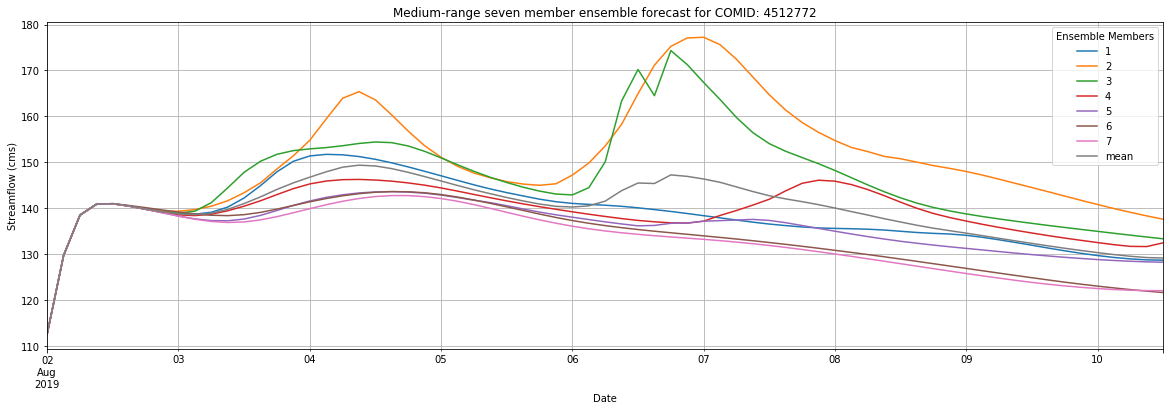

In [5]:
plotMediumRange(mr_df, comid)

## Stats

In [6]:
stats = mr_df.T.describe()
stats

,2019-08-02 00:00:00,2019-08-02 03:00:00,2019-08-02 06:00:00,2019-08-02 09:00:00,2019-08-02 12:00:00,2019-08-02 15:00:00,2019-08-02 18:00:00,2019-08-02 21:00:00,2019-08-03 00:00:00,2019-08-03 03:00:00,...,2019-08-09 09:00:00,2019-08-09 12:00:00,2019-08-09 15:00:00,2019-08-09 18:00:00,2019-08-09 21:00:00,2019-08-10 00:00:00,2019-08-10 03:00:00,2019-08-10 06:00:00,2019-08-10 09:00:00,2019-08-10 12:00:00
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,112.699997,129.759997,138.534283,140.888568,141.001425,140.505711,139.858568,139.251425,138.801425,138.624283,...,132.912854,132.365711,131.828568,131.312854,130.825711,130.364283,129.939997,129.567140,129.284283,129.177140
std,0.000000,0.000000,0.010498,0.017261,0.018070,0.048655,0.123569,0.198741,0.385354,0.726535,...,6.738467,6.608805,6.470468,6.327070,6.169653,6.009991,5.842458,5.681151,5.531677,5.447124
min,112.699997,129.759997,138.529997,140.879997,140.989997,140.479997,139.789997,139.049997,138.299997,137.629997,...,124.329997,123.879997,123.479997,123.119997,122.809997,122.539997,122.329997,122.179997,121.979997,121.669997
25%,112.699997,129.759997,138.529997,140.879997,140.989997,140.479997,139.789997,139.102497,138.514997,138.239997,...,129.034997,128.672497,128.324997,127.987497,127.689997,127.404997,127.157497,126.937497,126.784997,126.724997
50%,112.699997,129.759997,138.529997,140.879997,140.989997,140.479997,139.799997,139.230711,138.845711,138.677140,...,132.741426,132.167854,131.589283,131.036426,130.517854,130.042140,129.624997,129.278569,129.032140,128.943569
75%,112.699997,129.759997,138.531068,140.888925,141.008568,140.509283,139.866425,139.324997,139.017497,138.937497,...,135.714997,135.154997,134.612497,134.107497,133.624997,133.159997,132.709997,132.329997,132.199997,132.717497
max,112.699997,129.759997,138.559997,140.929997,141.029997,140.619997,140.149997,139.649997,139.369997,139.719997,...,145.429997,144.519997,143.599997,142.669997,141.739997,140.829997,139.949997,139.129997,138.349997,137.629997


## Plot the statistics

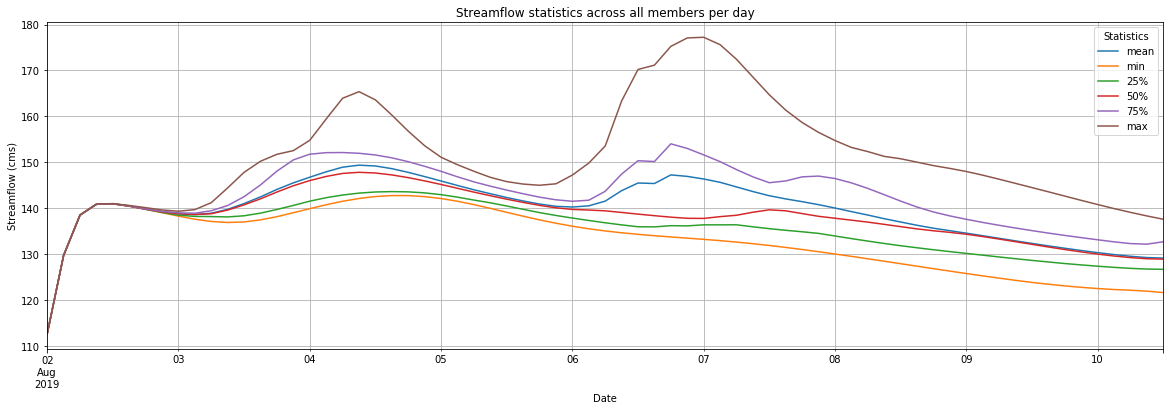

In [7]:
ax = stats.T.drop(columns=['count', 'std']).plot(figsize=(20,6), title ='Streamflow statistics across all members per day')
ax.legend(title='Statistics')
ax.grid(True, which="both")
ax.set(xlabel='Date', ylabel='Streamflow (cms)');

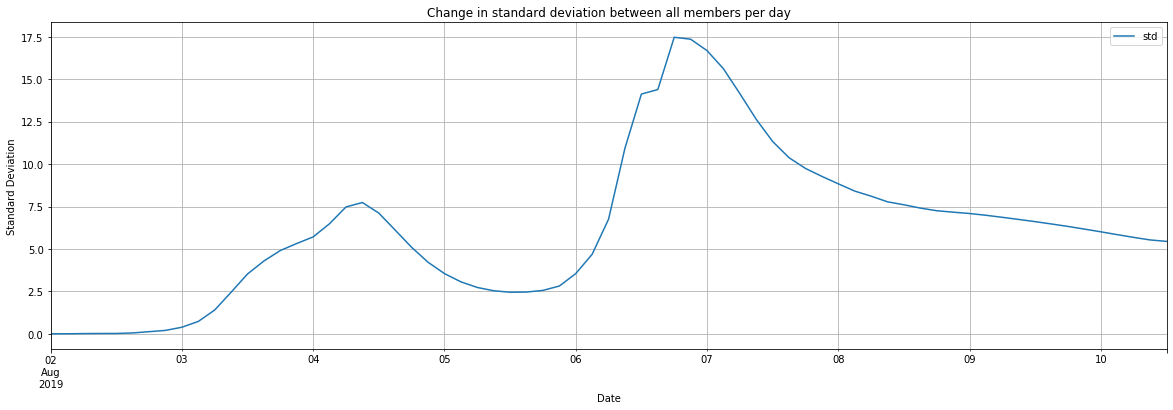

In [8]:
ax = stats.T.drop(columns=[x for x in list(stats.T.columns) if 'std' not in x]).plot(figsize=(20,6), title ='Change in standard deviation between all members per day')
ax.grid(True, which="both")
ax.set(xlabel='Date', ylabel='Standard Deviation');

# Convert Flow to Stage

In [9]:
f, rc_df = mr.get_NWM_rc()
rc_df.head()

,Stage,Discharge
0,0.0000,0.000000
1,0.3048,30.085741
2,0.6096,96.720480
3,0.9144,180.899337
4,1.2192,323.340296


## Apply the NWM rating curve and convert from streamflow to stage

In [10]:
stage_df = mr_df.apply(f).rename(columns={'streamflow': 'stage'})

## Plot the forecasted stage depth

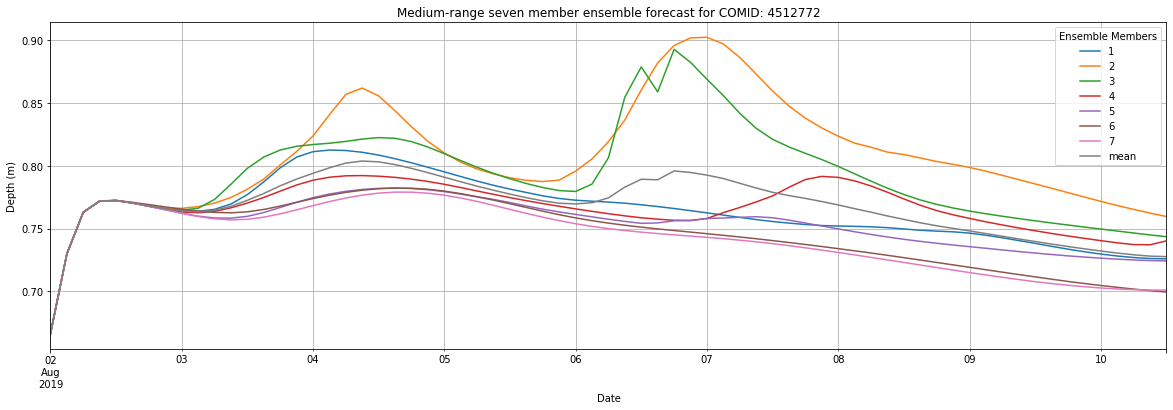

In [11]:
plotMediumRange(stage_df, comid, flow=False)

# Compare NWM rating curve with the USGS rating curve

In [12]:
USGS_rcs = get_USGS_rc(comid)
print(USGS_rcs[0])
USGS_rcs[1].head()

No rating curve available, please set `get_rc` = False for station 01646502


,INDEP,SHIFT,DEP,INDEP_SHIFT,INDEP_m,SHIFT_m,DEP_cms,INDEP_SHIFT_m
0,2.01,0.0,223.00,2.01,0.612648,0.0,6.314657,0.612648
1,2.02,0.0,226.14,2.02,0.615696,0.0,6.403572,0.615696
2,2.03,0.0,228.00,2.03,0.618744,0.0,6.456241,0.618744
3,2.04,0.0,230.80,2.04,0.621792,0.0,6.535528,0.621792
4,2.05,0.0,233.00,2.05,0.624840,0.0,6.597825,0.624840


## Apply it to the stream flow data to convert it to stage

In [13]:
stage_df_usgs = mr_df.apply(USGS_rcs[0]).rename(columns={'streamflow': 'stage_usgs'})
stage_df_usgs.head()

,1,2,3,4,5,6,7,mean
2019-08-02 00:00:00,0.975155,0.975155,0.975155,0.975155,0.975155,0.975155,0.975155,0.975155
2019-08-02 03:00:00,1.004343,1.004343,1.004343,1.004343,1.004343,1.004343,1.004343,1.004343
2019-08-02 06:00:00,1.018714,1.018666,1.018666,1.018666,1.018666,1.018666,1.018666,1.018673
2019-08-02 09:00:00,1.022513,1.022433,1.022433,1.022433,1.022433,1.022449,1.022433,1.022447
2019-08-02 12:00:00,1.022673,1.022609,1.022609,1.022609,1.022609,1.022673,1.022609,1.022627


## Plot them and compare

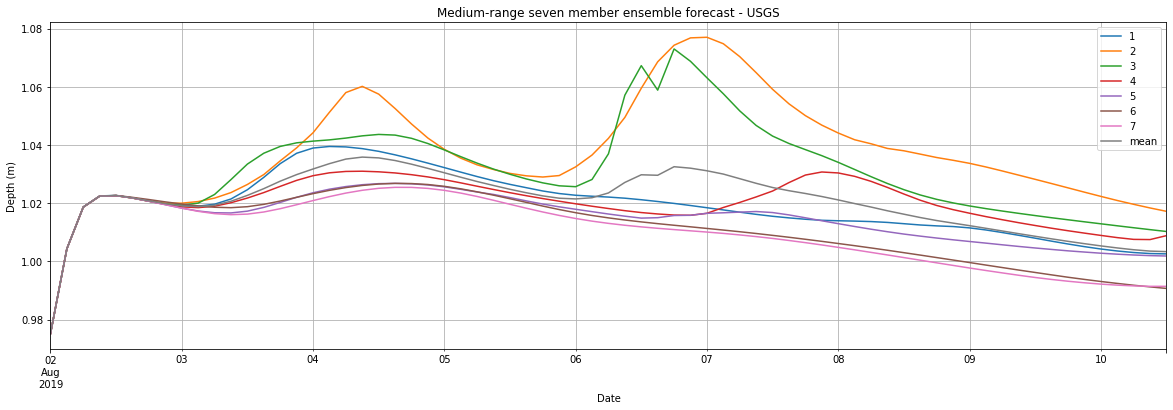

In [14]:
ax = stage_df_usgs.plot(figsize=(20,6), title='Medium-range seven member ensemble forecast - USGS')
ax.grid(True, which="both")
ax.set(xlabel='Date', ylabel='Depth (m)');

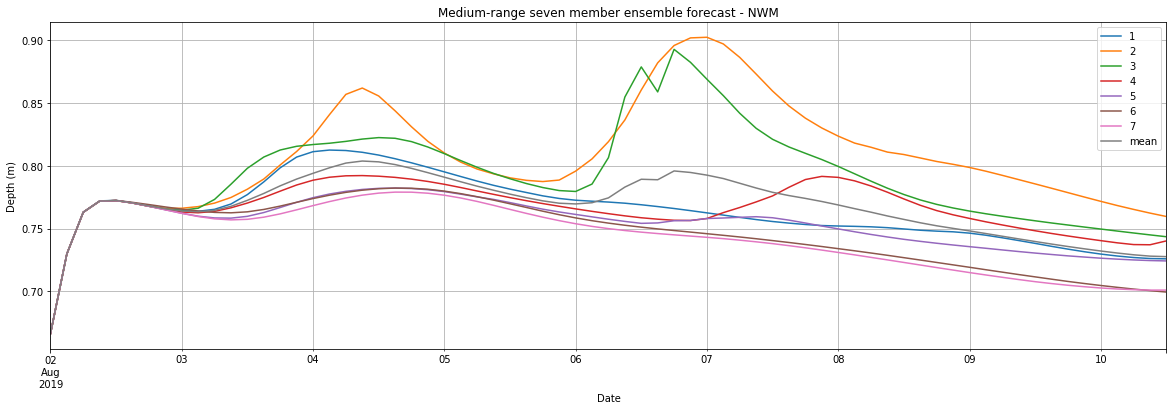

In [15]:
ax = stage_df.plot(figsize=(20,6), title='Medium-range seven member ensemble forecast - NWM')
ax.grid(True, which="both")
ax.set(xlabel='Date', ylabel='Depth (m)');

# USGS rating curve equates to a higher stage than the NWM rating curve